In [13]:
import pandas as pd

# Load the data
file_path = '/content/final_merged_youtube_trending_videos.csv'
data = pd.read_csv(file_path)

# Display basic information about the data
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        767 non-null    object
 1   title           767 non-null    object
 2   description     739 non-null    object
 3   published_at    767 non-null    object
 4   channel_id      767 non-null    object
 5   channel_title   767 non-null    object
 6   category_id     767 non-null    int64 
 7   tags            767 non-null    object
 8   duration        767 non-null    object
 9   definition      767 non-null    object
 10  caption         767 non-null    bool  
 11  view_count      767 non-null    int64 
 12  like_count      767 non-null    int64 
 13  dislike_count   767 non-null    int64 
 14  favorite_count  767 non-null    int64 
 15  comment_count   767 non-null    int64 
 16  category_name   767 non-null    object
 17  comments        767 non-null    object
 18  fetch_date

(None,
       video_id                                              title  \
 0  UUNCGURWXl0  Walmik Karad अखेर पुण्यात सरेंडर, कराडसाठी आले...   
 1  OgCdsfChAd4  2025 New Year Rasipalan | Astrology | எப்படி இ...   
 2  pme2zsax3eU  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...   
 3  h-tH2sCdOnQ  Baakiyalakshmi | 31st December 2024 to 4th Jan...   
 4  Az38f7cUzK8            School | Aakash Gupta | Stand-up Comedy   
 
                                          description          published_at  \
 0  #MumbaiTakNews  #LatestMarathiNews #Maharashtr...  2024-12-31T09:18:41Z   
 1  #rasipalan2025 #horoscope #suntv   #rasipalan ...  2025-01-01T02:19:18Z   
 2  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...  2024-12-31T10:21:24Z   
 3  பாக்கியலட்சுமி - திங்கள் முதல் சனி இரவு 8:30 ம...  2024-12-31T13:30:31Z   
 4  India US & UK Tour 2025 Tickets Link : https:/...  2024-12-28T16:04:03Z   
 
                  channel_id     channel_title  category_id  \
 0  UCQ2W9GCHctD59vQpvLKVg3g    

In [15]:
# Convert 'published_at' and 'fetch_date' to datetime objects
data['published_at'] = pd.to_datetime(data['published_at'])
data['fetch_date'] = pd.to_datetime(data['fetch_date'])

In [51]:
# Remove timezone information and keep everything in UTC
data['published_at'] = data['published_at'].dt.tz_localize(None)
data['fetch_date'] = data['fetch_date'].dt.tz_localize(None)

# Calculate survival time in days
data['survival_time'] = (data['fetch_date'] - data['published_at']).dt.days

# Define event: 1 if the video stopped trending after 3 days, 0 if still trending
data['event'] = (data['survival_time'] > 3).astype(int)

# Check the processed data
data[['video_id', 'published_at', 'fetch_date', 'survival_time', 'event']].head(10)


,video_id,published_at,fetch_date,survival_time,event
0,UUNCGURWXl0,2024-12-31 09:18:41,2025-01-01 18:41:00,1,0
1,OgCdsfChAd4,2025-01-01 02:19:18,2025-01-01 18:41:00,0,0
2,pme2zsax3eU,2024-12-31 10:21:24,2025-01-01 18:41:00,1,0
3,h-tH2sCdOnQ,2024-12-31 13:30:31,2025-01-01 18:41:00,1,0
4,Az38f7cUzK8,2024-12-28 16:04:03,2025-01-01 18:41:00,4,1
5,QgL8vKgTRsA,2024-12-30 16:19:21,2025-01-01 18:41:00,2,0
6,wjtrPCDsozY,2024-12-31 07:17:37,2025-01-01 18:41:00,1,0
7,975Am50aV_Q,2024-12-30 06:30:05,2025-01-01 18:41:00,2,0
8,Xk6g62Mc_Nk,2024-12-31 03:35:41,2025-01-01 18:41:00,1,0
9,bjQwJrfVHSw,2024-12-30 15:31:07,2025-01-01 18:41:00,2,0


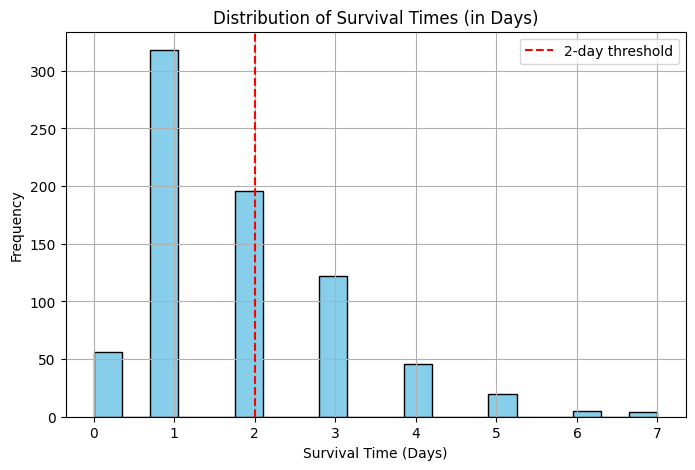

np.float64(9.778357235984354)

In [52]:
import matplotlib.pyplot as plt

# Update event definition to 2-day threshold
data['event'] = (data['survival_time'] > 3).astype(int)

# Plot updated histogram and threshold
plt.figure(figsize=(8, 5))
plt.hist(data['survival_time'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=2, color='red', linestyle='--', label='2-day threshold')
plt.title('Distribution of Survival Times (in Days)')
plt.xlabel('Survival Time (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Percentage of events with 2-day threshold
event_percentage = data['event'].mean() * 100
event_percentage


In [53]:
#pip install lifelines

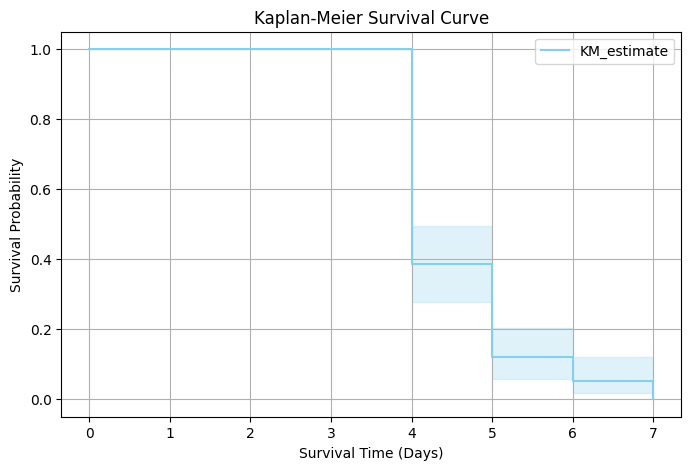

In [54]:
from lifelines import KaplanMeierFitter

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=data['survival_time'], event_observed=data['event'])

# Plot the Kaplan-Meier curve
plt.figure(figsize=(8, 5))
kmf.plot(ci_show=True, color='skyblue')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Survival Time (Days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [55]:
# Get survival function values
kmf.survival_function_


,KM_estimate
timeline,
0.0,1.000000
1.0,1.000000
2.0,1.000000
3.0,1.000000
4.0,0.386667
5.0,0.120000
6.0,0.053333
7.0,0.000000


In [56]:
# Get cumulative event probabilities (hazard function)
kmf.cumulative_density_


,KM_estimate
timeline,
0.0,0.000000
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.613333
5.0,0.880000
6.0,0.946667
7.0,1.000000


In [57]:
# Predict survival probability at specific days
kmf.predict([2, 3,5, 10])


,KM_estimate
2,1.00
3,1.00
5,0.12
10,0.00


In [58]:
# Get median survival time (when 50% of videos have stopped trending)
kmf.median_survival_time_


np.float64(4.0)

In [59]:
from lifelines.statistics import logrank_test

# Select top 5 categories for comparison to avoid clutter
top_categories = data['category_name'].value_counts().index[:5]
filtered_data = data[data['category_name'].isin(top_categories)]

# Perform Log-Rank Test between the top 5 categories
from itertools import combinations

results = {}
for cat1, cat2 in combinations(top_categories, 2):
    data_cat1 = filtered_data[filtered_data['category_name'] == cat1]
    data_cat2 = filtered_data[filtered_data['category_name'] == cat2]

    result = logrank_test(
        data_cat1['survival_time'], data_cat2['survival_time'],
        event_observed_A=data_cat1['event'], event_observed_B=data_cat2['event']
    )

    results[f"{cat1} vs {cat2}"] = result.p_value

# Sort results by p-value
results = dict(sorted(results.items(), key=lambda x: x[1]))
results


{'Howto & Style vs Gaming': np.float64(0.31731050786291115),
 'Entertainment vs Gaming': np.float64(0.34312756555469853),
 'Music vs Howto & Style': np.float64(0.49039249706095045),
 'Music vs Gaming': np.float64(0.5367213764860023),
 'Entertainment vs Howto & Style': np.float64(0.563388611024499),
 'People & Blogs vs Music': np.float64(0.7149948861226181),
 'People & Blogs vs Gaming': np.float64(0.7374736475765492),
 'Entertainment vs Music': np.float64(0.7825713395377655),
 'People & Blogs vs Howto & Style': np.float64(0.9732598563681155),
 'Entertainment vs People & Blogs': np.float64(0.9804471247421159)}

In [60]:
from lifelines import CoxPHFitter

In [67]:
# Create engagement rate using correct column names
data['engagement_rate'] = (data['like_count'] + data['comment_count']) / data['view_count']

# Select relevant columns for Cox model
cox_data = data[['survival_time', 'event', 'view_count', 'like_count']]

# One-hot encode categorical variable 'category_name'
#cox_data = pd.get_dummies(cox_data, columns=['category_name'], drop_first=True)

# Fit Cox model with regularization
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cox_data, duration_col='survival_time', event_col='event')

# Display summary of the Cox model
cph.summary


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
view_count,-9.023245e-09,1.000000,8.624853e-09,-2.592765e-08,7.881156e-09,1.000000,1.0,0.0,-1.046191,0.295473,1.758903
like_count,-7.873188e-07,0.999999,3.779681e-07,-1.528123e-06,-4.651492e-08,0.999998,1.0,0.0,-2.083030,0.037249,4.746673


In [17]:
!conda install -c conda-forge sksurv

/bin/bash: line 1: conda: command not found


In [14]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# Prepare the data for Random Survival Forest
rsf_data = data[['survival_time', 'event', 'view_count', 'engagement_rate', 'category_name']]
rsf_data = pd.get_dummies(rsf_data, columns=['category_name'], drop_first=True)

# Create structured array for survival analysis
y = Surv.from_dataframe("event", "survival_time", rsf_data)
X = rsf_data.drop(columns=['survival_time', 'event'])

# Fit the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=5, random_state=42)
rsf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rsf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importance


ModuleNotFoundError: No module named 'sksurv'

In [ ]:
from lifelines import CoxPHFitter

# Select relevant columns (duration, event, category)
cox_data = data[data['category_name'].isin(['Entertainment', 'Music', 'Sports'])][['duration_days', 'event', 'category_name']]

# One-hot encode category
cox_data = pd.get_dummies(cox_data, columns=['category_name'], drop_first=True)

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='duration_days', event_col='event')

# Display results
cph.print_summary()

# Plot hazard ratios
plt.figure(figsize=(8, 4))
cph.plot(hazard_ratios=True)
plt.title('Cox Model Hazard Ratios for Categories')
plt.show()


In [5]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=01e06eeeb445ec99cbb57e6db6e28658456c8c92a9dab0969eca64b63a2d1d10
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
